<a href="https://colab.research.google.com/github/xRAFPx/AAII/blob/master/RNN_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Secção igual à do documento Model

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
# !pip install livelossplot

In [199]:
import requests
import json
import csv
import string
import io
import pandas as pd
from tempfile import NamedTemporaryFile
import shutil
from datetime import date
import datetime
import os.path
from os import path
import re
import xlrd
import math
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from getpass import getpass
from functools import reduce
# from livelossplot import PlotLossesKeras, PlotLossesKerasTF
from keras.callbacks import ModelCheckpoint
# from livelossplot.tf_keras import PlotLossesCallback
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Variáveis

Variáveis utilizadas no decorrer do trabalho

In [200]:
folder = '/content/drive/My Drive/Colab Notebooks/AII Project'
gitFolder = '/content/AAII/Data'

#Temperatura
norte_weather_filepath = folder + '/weather_norte.csv'
centro_weather_filepath = folder + '/weather_centro.csv'
lvt_weather_filepath = folder + '/weather_lvt.csv'
algarve_weather_filepath = folder + '/weather_algarve.csv'
alentejo_weather_filepath = folder + '/weather_alentejo.csv'

#Óbitos COVID-19
acores_death_filepath = folder + '/acores_death.csv'
madeira_death_filepath = folder + '/madeira_death.csv'
alentejo_death_filepath = folder + '/alentejo_death.csv'
algarve_death_filepath = folder + '/algarve_death.csv'
lvt_death_filepath = folder + '/lvt_death.csv'
centro_death_filepath = folder + '/centro_death.csv'
norte_death_filepath = folder + '/norte_death.csv'

#Casos Confirmados COVID-19
acores_filepath = folder + '/acores.csv'
madeira_filepath = folder + '/madeira.csv'
alentejo_filepath = folder + '/alentejo.csv'
algarve_filepath = folder + '/algarve.csv'
lvt_filepath = folder + '/lvt.csv'
centro_filepath = folder + '/centro.csv'
norte_filepath = folder + '/norte.csv'


In [201]:
if path.exists(folder):
  print("No directory error")
else:
  #Create a new directory (a folder) in your Drive
  os.mkdir(folder)
  print("Directory created")


No directory error


In [202]:
def read_dataset(url):
  df = pd.read_csv(url, parse_dates=[0], index_col=[0], infer_datetime_format=True)
  return df.fillna(value=0)

In [203]:
df_norte = read_dataset(norte_filepath)
# pd.set_option('display.max_rows', df_norte.shape[0]+1)
# print(df_norte)
df_centro = read_dataset(centro_filepath)
df_lvt = read_dataset(lvt_filepath)
df_alentejo = read_dataset(alentejo_filepath)
df_algarve = read_dataset(algarve_filepath)
df_madeira = read_dataset(madeira_filepath)
df_acores = read_dataset(acores_filepath)

In [204]:
df_norte.shape

(116, 1)

In [205]:
df_acores_death = read_dataset(norte_filepath)
df_madeira_death = read_dataset(madeira_death_filepath)
df_alentejo_death = read_dataset(alentejo_death_filepath)
df_algarve_death = read_dataset(algarve_death_filepath)
df_lvt_death = read_dataset(lvt_death_filepath)
df_centro_death = read_dataset(centro_death_filepath)
df_norte_death = read_dataset(norte_death_filepath)

In [206]:
df_norte_weather = read_dataset(norte_weather_filepath)
df_centro_weather = read_dataset(centro_weather_filepath)
df_lvt_weather = read_dataset(lvt_weather_filepath)
df_algarve_weather = read_dataset(algarve_weather_filepath)
df_alentejo_weather = read_dataset(alentejo_weather_filepath)

In [207]:
df_norte[df_norte<0]=0

In [208]:
df_centro[df_centro<0]=0

In [209]:
df_lvt[df_lvt<0]=0
df_alentejo[df_alentejo<0]=0
df_algarve[df_algarve<0]=0
df_acores[df_acores<0]=0
df_madeira[df_madeira<0]=0

## Preparação dos dados

Escalar os dados (os valores estarão entre 0 e 1) para aumentar a velocidade do treino e o desempenho do modelo. Como se trata de novos casos de COVID-19, não há valores negativos pelo que esta escala enfatiza esse facto.

In [210]:
def data_normalization(df):
  scaler = MinMaxScaler()
  df = scaler.fit_transform(df)
  return scaler, df

In [211]:
scaler_norte, df_norte = data_normalization(df_norte)
scaler_centro, df_centro = data_normalization(df_centro)
scaler_lvt, df_lvt = data_normalization(df_lvt)
scaler_alentejo, df_alentejo = data_normalization(df_alentejo)
scaler_algarve, df_algarve = data_normalization(df_algarve)
scaler_madeira, df_madeira = data_normalization(df_madeira)
scaler_acores, df_acores = data_normalization(df_acores)

In [212]:
df_norte.shape

(116, 1)

In [213]:
scaler_norte_death, df_norte_death = data_normalization(df_norte_death)
scaler_centro_death, df_centro_death = data_normalization(df_centro_death)
scaler_lvt_death, df_lvt_death = data_normalization(df_lvt_death)
scaler_alentejo_death, df_alentejo_death = data_normalization(df_alentejo_death)
scaler_algarve_death, df_algarve_death = data_normalization(df_algarve_death)
scaler_madeira_death, df_madeira_death = data_normalization(df_madeira_death)
scaler_acores_death, df_acores_death = data_normalization(df_acores_death)

In [214]:
scaler_norte_weather, df_norte_weather = data_normalization(df_norte_weather)
scaler_centro_weather, df_centro_weather = data_normalization(df_centro_weather)
scaler_lvt_weather, df_lvt_weather = data_normalization(df_lvt_weather)
scaler_alentejo_weather, df_alentejo_weather = data_normalization(df_alentejo_weather)
scaler_algarve_weather, df_algarve_weather = data_normalization(df_algarve_weather)

#RNN

A RNN escolhe o que armazenar e o que esquecer. Nos segundo e terceiro períodos de tempo, a RNR representada acima julgou que era importante usar metade do seu estado oculto para armazenar o que foi observado naqueles momentos. Já no quarto período, a RNR julgou que só um pouco da informação capturada valia a pena armazenar, utilizando apena um quarto do seu estado oculto para isso.

Numa primeira fase, a análise foi univariada, isto é, apenas a *feature* relativa aos novos casos confirmados está envolvida no treino e posterior previsão.
Procedi então à construção de um modelo supervisionado em que a cada 4 dias (X; preditor) têm como preditivo (y) o próximo dia.

Como se trata de um problema de regressão (e não de classificação), estamos a tentar prever os resultados em uma saída contínua, o que significa que estamos a tentar mapear variáveis ​​de entrada (preditor) para alguma função contínua (preditivo).

Para este modelo a construção desta estrutura é fundamental para que os dados possam ser tratados pelo modelo.

A criação de uma análise supervisionada foi feita para 4 dias por tratar de meia semana, sendo que os dados do COVID-19 variam de forma recorrente a cada semana.

Foi criada uma aprendizagem supervisionada com esta estrutura visto que os dados de novos casos confirmados depende dos dados de dias anteriores, visto que uma pessoa pode ter ficado infetada à vários dias e só apresentar sintomas hoje. No caso das RNN, o modelo escolhe que dados lembrar e que dados esquecer dos dados passados. Criar uma estrutura desta forma persiste no modelo dados de vários dias ao serem incluídos no input.

In [215]:
def build_supervised(df, timesteps):
	data = df
	X, y = list(), list()
	dataset_size = len(data)
	for curr_pos in range(dataset_size):
		input_index =  curr_pos + timesteps
		label_index = input_index + 1
		if label_index <= dataset_size:
			X.append(data[curr_pos:input_index, :])
			y.append(data[input_index:label_index, 0])
	return np.array(X).astype('float32'), np.array(y).astype('float32')

In [216]:
timesteps = 4

In [217]:
X_norte, y_norte = build_supervised(df_norte, timesteps)
X_centro, y_centro = build_supervised(df_centro, timesteps)
X_lvt, y_lvt = build_supervised(df_lvt, timesteps)
X_alentejo, y_alentejo = build_supervised(df_alentejo, timesteps)
X_algarve, y_algarve = build_supervised(df_algarve, timesteps)
X_acores, y_acores = build_supervised(df_acores, timesteps)
X_madeira, y_madeira = build_supervised(df_madeira, timesteps)

Criar as estruturas de treino, teste e validação do modelo com 10% para teste, 10% para validação e os restantes 80% para treino. Para ter uma estrutura de dados com todos os dados exceto os de teste para otimizar os dados, visto que temos poucos dias de dados, criei outra estrutura com os dados de treino e de validação.

In [218]:
valid_test_percent = 0.1
df_region_valid_test_size = int(np.round(valid_test_percent * X_norte.shape[0]))
df_region_train_size = X_norte.shape[0] - df_region_valid_test_size*2

In [219]:
df_region_valid_test_size

11

In [220]:
df_region_train_size

90

In [221]:
X_train_norte = X_norte[:df_region_train_size]
y_train_norte = y_norte[:df_region_train_size]

X_train_centro = X_centro[:df_region_train_size]
y_train_centro = y_centro[:df_region_train_size]

X_train_lvt = X_lvt[:df_region_train_size]
y_train_lvt = y_lvt[:df_region_train_size]

X_train_algarve = X_algarve[:df_region_train_size]
y_train_algarve = y_algarve[:df_region_train_size]

X_train_alentejo = X_alentejo[:df_region_train_size]
y_train_alentejo = y_alentejo[:df_region_train_size]

X_train_madeira = X_madeira[:df_region_train_size]
y_train_madeira = y_madeira[:df_region_train_size]

X_train_acores = X_acores[:df_region_train_size]
y_train_acores = y_acores[:df_region_train_size]

In [222]:
X_test_norte = X_norte[df_region_train_size + df_region_valid_test_size :]
y_test_norte = y_norte[df_region_train_size + df_region_valid_test_size :]

X_test_centro = X_centro[df_region_train_size + df_region_valid_test_size :]
y_test_centro = y_centro[df_region_train_size + df_region_valid_test_size :]

X_test_lvt = X_lvt[df_region_train_size + df_region_valid_test_size :]
y_test_lvt = y_lvt[df_region_train_size + df_region_valid_test_size :]

X_test_algarve = X_algarve[df_region_train_size + df_region_valid_test_size :]
y_test_algarve = y_algarve[df_region_train_size + df_region_valid_test_size :]

X_test_alentejo = X_alentejo[df_region_train_size + df_region_valid_test_size :]
y_test_alentejo = y_alentejo[df_region_train_size + df_region_valid_test_size :]

X_test_madeira = X_madeira[df_region_train_size + df_region_valid_test_size :]
y_test_madeira = y_madeira[df_region_train_size + df_region_valid_test_size :]

X_test_acores = X_acores[df_region_train_size + df_region_valid_test_size :]
y_test_acores = y_acores[df_region_train_size + df_region_valid_test_size :]

In [223]:
X_val_norte = X_norte[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_norte = y_norte[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_centro = X_centro[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_centro = y_centro[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_lvt = X_lvt[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_lvt = y_lvt[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_algarve = X_algarve[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_algarve = y_algarve[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_alentejo = X_alentejo[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_alentejo = y_alentejo[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_madeira = X_madeira[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_madeira = y_madeira[df_region_train_size:df_region_train_size + df_region_valid_test_size]

X_val_acores = X_acores[df_region_train_size:df_region_train_size + df_region_valid_test_size]
y_val_acores = y_acores[df_region_train_size:df_region_train_size + df_region_valid_test_size]

In [224]:
X_train_val_norte = X_norte[:df_region_train_size + df_region_valid_test_size]
y_train_val_norte = y_norte[:df_region_train_size + df_region_valid_test_size]

X_train_val_centro = X_centro[:df_region_train_size + df_region_valid_test_size]
y_train_val_centro = y_centro[:df_region_train_size + df_region_valid_test_size]

X_train_val_lvt = X_lvt[:df_region_train_size + df_region_valid_test_size]
y_train_val_lvt = y_lvt[:df_region_train_size + df_region_valid_test_size]

X_train_val_algarve = X_algarve[:df_region_train_size + df_region_valid_test_size]
y_train_val_algarve = y_algarve[:df_region_train_size + df_region_valid_test_size]

X_train_val_alentejo = X_alentejo[:df_region_train_size + df_region_valid_test_size]
y_train_val_alentejo = y_alentejo[:df_region_train_size + df_region_valid_test_size]

X_train_val_madeira = X_madeira[:df_region_train_size + df_region_valid_test_size]
y_train_val_madeira = y_madeira[:df_region_train_size + df_region_valid_test_size]

X_train_val_acores = X_acores[:df_region_train_size + df_region_valid_test_size]
y_train_val_acores = y_acores[:df_region_train_size + df_region_valid_test_size]

In [225]:
y_train_acores.shape

(90, 1)

**Dia 20 de junho de 2020**

Os dados do COVID-19 começaram a ser partilhados a partir da Quarta-feira, 26 de Fevereiro de 2020.
Até ao dia 20 de junho (incluído) são 116 dias.

Como são 116 dias de dados do COVID-19 o que faz com que sejam 112 grupos de 4 dias => 116/4 = 29; 29-1 = 28; 28*4=112

Treino => 80% de 112 = 90

Teste => 10% de 112 = 11

Validação => 10% de 112 = 11

90 + 11 + 11 = 112 grupos de 4 dias


In [226]:
print(X_train_norte.shape)
print(y_train_norte.shape)

print(X_test_norte.shape)
print(y_test_norte.shape)

print(X_val_norte.shape)
print(y_val_norte.shape)

print(X_train_val_norte.shape)
print(y_train_val_norte.shape)

(90, 4, 1)
(90, 1)
(11, 4, 1)
(11, 1)
(11, 4, 1)
(11, 1)
(101, 4, 1)
(101, 1)


In [227]:
X_train_norte_re = X_train_norte.reshape(X_train_norte.shape[0], X_train_norte.shape[1])
y_train_norte_re = y_train_norte.reshape(y_train_norte.shape[0],)

X_test_norte_re = X_test_norte.reshape(X_test_norte.shape[0], X_test_norte.shape[1])
y_test_norte_re = y_test_norte.reshape(y_test_norte.shape[0],)

X_val_norte_re = X_val_norte.reshape(X_val_norte.shape[0], X_val_norte.shape[1])
y_val_norte_re = y_val_norte.reshape(y_val_norte.shape[0],)

X_train_val_norte_re = X_train_val_norte.reshape(X_train_val_norte.shape[0], X_train_val_norte.shape[1])
y_train_val_norte_re = y_train_val_norte.reshape(y_train_val_norte.shape[0],)

In [228]:
X_train_norte.shape

(90, 4, 1)

In [229]:
X_train_norte_re.shape

(90, 4)

In [230]:
X_train_centro_re = X_train_centro.reshape(X_train_centro.shape[0], X_train_centro.shape[1])
y_train_centro_re = y_train_centro.reshape(y_train_centro.shape[0],)

X_test_centro_re = X_test_centro.reshape(X_test_centro.shape[0], X_test_centro.shape[1])
y_test_centro_re = y_test_centro.reshape(y_test_centro.shape[0],)

X_val_centro_re = X_val_centro.reshape(X_val_centro.shape[0], X_val_centro.shape[1])
y_val_centro_re = y_val_centro.reshape(y_val_centro.shape[0],)

X_train_val_centro_re = X_train_val_centro.reshape(X_train_val_centro.shape[0], X_train_val_centro.shape[1])
y_train_val_centro_re = y_train_val_centro.reshape(y_train_val_centro.shape[0],)

In [231]:
X_train_lvt_re = X_train_lvt.reshape(X_train_lvt.shape[0], X_train_lvt.shape[1])
y_train_lvt_re = y_train_lvt.reshape(y_train_lvt.shape[0],)

X_test_lvt_re = X_test_lvt.reshape(X_test_lvt.shape[0], X_test_lvt.shape[1])
y_test_lvt_re = y_test_lvt.reshape(y_test_lvt.shape[0],)

X_val_lvt_re = X_val_lvt.reshape(X_val_lvt.shape[0], X_val_lvt.shape[1])
y_val_lvt_re = y_val_lvt.reshape(y_val_lvt.shape[0],)

X_train_val_lvt_re = X_train_val_lvt.reshape(X_train_val_lvt.shape[0], X_train_val_lvt.shape[1])
y_train_val_lvt_re = y_train_val_lvt.reshape(y_train_val_lvt.shape[0],)

In [232]:
X_train_algarve_re = X_train_algarve.reshape(X_train_algarve.shape[0], X_train_algarve.shape[1])
y_train_algarve_re = y_train_algarve.reshape(y_train_algarve.shape[0],)

X_test_algarve_re = X_test_algarve.reshape(X_test_algarve.shape[0], X_test_algarve.shape[1])
y_test_algarve_re = y_test_algarve.reshape(y_test_algarve.shape[0],)

X_val_algarve_re = X_val_algarve.reshape(X_val_algarve.shape[0], X_val_algarve.shape[1])
y_val_algarve_re = y_val_algarve.reshape(y_val_algarve.shape[0],)

X_train_val_algarve_re = X_train_val_algarve.reshape(X_train_val_algarve.shape[0], X_train_val_algarve.shape[1])
y_train_val_algarve_re = y_train_val_algarve.reshape(y_train_val_algarve.shape[0],)

In [233]:
X_train_acores_re = X_train_acores.reshape(X_train_acores.shape[0], X_train_acores.shape[1])
y_train_acores_re = y_train_acores.reshape(y_train_acores.shape[0],)

X_test_acores_re = X_test_acores.reshape(X_test_acores.shape[0], X_test_acores.shape[1])
y_test_acores_re = y_test_acores.reshape(y_test_acores.shape[0],)

X_val_acores_re = X_val_acores.reshape(X_val_acores.shape[0], X_val_acores.shape[1])
y_val_acores_re = y_val_acores.reshape(y_val_acores.shape[0],)

X_train_val_acores_re = X_train_val_acores.reshape(X_train_val_acores.shape[0], X_train_val_acores.shape[1])
y_train_val_acores_re = y_train_val_acores.reshape(y_train_val_acores.shape[0],)

In [234]:
X_train_alentejo_re = X_train_alentejo.reshape(X_train_alentejo.shape[0], X_train_alentejo.shape[1])
y_train_alentejo_re = y_train_alentejo.reshape(y_train_alentejo.shape[0],)

X_test_alentejo_re = X_test_alentejo.reshape(X_test_alentejo.shape[0], X_test_alentejo.shape[1])
y_test_alentejo_re = y_test_alentejo.reshape(y_test_alentejo.shape[0],)

X_val_alentejo_re = X_val_alentejo.reshape(X_val_alentejo.shape[0], X_val_alentejo.shape[1])
y_val_alentejo_re = y_val_alentejo.reshape(y_val_alentejo.shape[0],)

X_train_val_alentejo_re = X_train_val_alentejo.reshape(X_train_val_alentejo.shape[0], X_train_val_alentejo.shape[1])
y_train_val_alentejo_re = y_train_val_alentejo.reshape(y_train_val_alentejo.shape[0],)

In [235]:
X_train_madeira_re = X_train_madeira.reshape(X_train_madeira.shape[0], X_train_madeira.shape[1])
y_train_madeira_re = y_train_madeira.reshape(y_train_madeira.shape[0],)

X_test_madeira_re = X_test_madeira.reshape(X_test_madeira.shape[0], X_test_madeira.shape[1])
y_test_madeira_re = y_test_madeira.reshape(y_test_madeira.shape[0],)

X_val_madeira_re = X_val_madeira.reshape(X_val_madeira.shape[0], X_val_madeira.shape[1])
y_val_madeira_re = y_val_madeira.reshape(y_val_madeira.shape[0],)

X_train_val_madeira_re = X_train_val_madeira.reshape(X_train_val_madeira.shape[0], X_train_val_madeira.shape[1])
y_train_val_madeira_re = y_train_val_madeira.reshape(y_train_val_madeira.shape[0],)

## Construção do modelo

O modelo foi construido a partir de uma busca a 15 modelos aleatórios e escolhido o que obtia menor loss na avaliação do modelo com dados desconhecidos no mesmo.

Os modelos foram construidos a partir de uma escolha aleatória de hiperparâmetros e do próprio modelo a utilizar. As variáveis a escolher foram:
* Número de camadas e de neurónios
* Modelo a utilizar
* Valor de dropout
* Otimizador
* Valor de learning rate
* Épocas (epochs)
* Batch size

Esta busca aleatória permite testar vários modelos e escolher o que oferece melhor valor de erro. Para além disso, os valores que foram colocados como hipótese já tinham em conta os dados apresentados: 
* Dropout nunca poderá ser 0 porque os dados, ao serem poucos, teria uma grande tendência a sofrer overfitting
* Número de camadas e de neurónios apresentavam várias estruturas de forma a criar modelos simples ou mais complexos
* Learning rate com vários valores de forma a analisar se isso afeta em termos de erro na validação

Numa primeira fase foi feita uma busca exaustiva, isto é, testados todos os exemplos a partir do uso de GridSearchCV e de TimeSeriesSplit que permite que o modelo crie datasets de teste e treino variáveis consoante o número de divisões (split) definido. No entanto, devido ao nível computacional exigido para implementar essa solução, segui esta metodologia. No entanto, um exemplo do que foi testado pode ser encontrado no seguinte [link](https://github.com/xRAFPx/AAII/blob/master/RNN_Univariate_TSS.ipynb).

Tal como nos exemplos anteriores, a variável do erro foi a MSE (ou RMSE que é a raiz do valor da MSE).

In [236]:
def rmse(y_true, y_pred):
    #RMSE = tf.sqrt(tf.losses.mean_squared_error(y_pred, y_true))
    #RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_pred, y_true))))
    return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true)))

Consoante o valor escolhido na procura aleatória, o modelo poderá apresentar camadas SimpleRNN, LSTM ou GRU. A procura aleatória também define o número de camadas e a quantidade de neurónios da mesma. Por se tratar de um modelo sequencial, o valor de return_sequences na primeira camada terá de ser True para que sejam as camadas sejam intercaladas.

Como queremos que o valor de saída seja um valor contínuo entre 0 e 1 (por os dados estarem normalizados), a função de ativação utilizada na última camada (Dense) é a sigmoid. 

O valor de neurónios na última camada é 1 por se tratar de querer a previsão para o próximo timestep de novos casos confirmados de COVID-19.

In [237]:
def model_grid_search(model_type, layers, dropout_rate, timesteps, features):
  model = tf.keras.models.Sequential() 
  if len(layers) > 0:
    for i in range(len(layers)):
      if model_type == 'RNN':
        if i == 0 and len(layers) > 1:
          model.add(tf.keras.layers.SimpleRNN(int(layers[i]), return_sequences=True, input_shape=(timesteps, features)))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
        elif i == 0 and len(layers) == 1:
          model.add(tf.keras.layers.SimpleRNN(int(layers[i]), input_shape=(timesteps, features)))
        elif i == len(layers)-1:
          model.add(tf.keras.layers.SimpleRNN(int(layers[i])))
        else:
          model.add(tf.keras.layers.SimpleRNN(int(layers[i]), return_sequences=True))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
      elif model_type == 'LSTM':
        if i == 0 and len(layers) > 1:
          model.add(tf.keras.layers.LSTM(int(layers[i]), return_sequences=True, input_shape=(timesteps, features)))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
        elif i == 0 and len(layers) == 1:
          model.add(tf.keras.layers.LSTM(int(layers[i]), input_shape=(timesteps, features)))
        elif i == len(layers)-1:
          model.add(tf.keras.layers.LSTM(int(layers[i])))
        else:
          model.add(tf.keras.layers.LSTM(int(layers[i]), return_sequences=True))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
      else:
        if i == 0 and len(layers) > 1:
          model.add(tf.keras.layers.GRU(int(layers[i]), return_sequences=True, input_shape=(timesteps, features)))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
        elif i == 0 and len(layers) == 1:
          model.add(tf.keras.layers.GRU(int(layers[i]), input_shape=(timesteps, features)))
        elif i == len(layers)-1:
          model.add(tf.keras.layers.GRU(int(layers[i])))
        else:
          model.add(tf.keras.layers.GRU(int(layers[i]), return_sequences=True))
          if dropout_rate > 0: model.add(tf.keras.layers.Dropout(dropout_rate))  
  model.add(tf.keras.layers.Dense(1, activation="sigmoid"))  
  return model


Por se tratar de séries temporais em que a ordem dos elementos é relevante para o problema, o valor de shuffle no treino do modelo terá de ser False, para que os dados a entrar na rede não sejam baralhados. Como é um problema supervisionado, o valor do preditor depende da ordem de entrada do preditivo.

In [238]:
def train_dnn(model, alg, lr, Xtrain, Ytrain, epochs, batch_size):
    if alg == "adam":
        optimizer = tf.keras.optimizers.Adam(lr = lr)
    elif alg == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(lr = lr)
    elif alg == "sgd_momentum":
        optimizer = tf.keras.optimizers.SGD(lr = lr, momentum = 0.9)
    else: optimizer = tf.keras.optimizers.SGD(lr = lr)
        
    model.compile(optimizer = optimizer, loss = rmse, metrics = ['mae', 'accuracy', rmse])
    lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'mae', factor = 0.2, patience = 50, min_lr = lr*10)
    model.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, shuffle = False, verbose = 0, callbacks = [lr])

    return model

Os parâmetros do melhor modelo (o que tiver menor erro) é guardado para que depois possa ser apresentado.

In [239]:
def dnn_optimization(opt_params, Xtrain, Ytrain, Xval, Yval, iterations, timesteps, features, city, verbose = True):
    from random import choice
  
    best_acc = None
    best_loss = None

    if verbose:
      print("Topology\tDropout\tAlgorithm\tLearning Rate\tValidation Loss\tValidation Acc\tEpochs\tBatch Size\tModel Type\n")

    if "topology" in opt_params:
        topologies = opt_params["topology"]
    else: topologies = [[100]]
    if "algorithm" in opt_params:
        algs = opt_params["algorithm"]
    else: algs = ["adam"]
    if "lr" in opt_params:
        lrs = opt_params["lr"]
    else: lrs = [0.001]
    if "dropout" in opt_params:
        dropouts = opt_params["dropout"]
    else: dropouts= [0.0]
    if "epochs" in opt_params:
        epochs = opt_params["epochs"]
    else: epochs = [10000]
    if "batch_size" in opt_params:
        batch_sizes = opt_params["batch_size"]
    else: batch_sizes = [16]
    if "model" in opt_params:
        model = opt_params["model"]
    else: model = "LSTM"
    conf=list()
    for it in range(iterations):

        layers = choice(topologies)
        dropout_rate = choice(dropouts)
        model_type = choice(model)
        dnn = model_grid_search(model_type, layers, dropout_rate, timesteps, features)

        alg = choice(algs)
        lr = choice(lrs)
        epoch = choice(epochs)
        batch_size = choice(batch_sizes)
        
        dnn = train_dnn(dnn, alg, lr, Xtrain, Ytrain,  epoch, batch_size)
        results = dnn.evaluate(Xval, Yval, verbose = 0)
        
        if verbose: 
            print(str(layers), "\t", str(dropout_rate), "\t", alg, "\t", str(lr), "\t", str(results[0]), "\t", str(results[1]), "\t", str(epoch), "\t", str(batch_size), "\t", model_type)
        
        conf.append([layers, dropout_rate, alg, lr, results[0], results[1], epoch, batch_size, model_type])

        if best_loss is None or results[0] < best_loss:
            best_loss = results[0]
            best_acc = results[1]
            best_config = (layers, dropout_rate, alg, lr, epoch, batch_size, model_type)

    return best_config, best_acc, best_loss, conf

In [240]:
model_folder = folder + '/Model Output'
best_fileRNN = model_folder + '/bestResults_RNN_Uni.csv'

In [249]:
def RNN_model_search(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, timesteps, features, city):

  export_file = model_folder + '/UniRNN' + city + '.csv'
  opt_pars = {"topology":[[100, 50], [100, 100, 100], [50, 100, 50], [100, 150], [20, 20], [100, 20], [10,10,10]],
            "algorithm": [ "adam", "rmsprop", "sgd_momentum"],
            "lr": [0.01, 0.001, 0.0001],
            "dropout": [0.2, 0.5, 0.7],
            "epochs": [500, 1000, 10000],
            "batch_size": [8, 16, 32, 64],
            "model": ["RNN", "LSTM", "GRU"]
            }

  best_config, best_val_acc, best_val_loss, conf = dnn_optimization(opt_pars, X_train, y_train, X_val, y_val, 15, timesteps, features, city)  
  pd.DataFrame(conf).to_csv(export_file, header=["layers", "dropout", "algorithm", "learning rate", "val_loss", "val_acc", "epochs", "batch_size", "model"])    
  print("Best configuration:", best_config)
  print("Best validation accuracy:", best_val_acc) 
  print("Best validation loss:", best_val_loss)
  # take best configuration and retrain with whole training set
  # evaluate error on holdout test set
  best_model = model_grid_search(best_config[6], best_config[0], best_config[1], timesteps, features)

  best_model = train_dnn(best_model, best_config[2], best_config[3], X_train_val, y_train_val, best_config[4], best_config[5])
  test_results = best_model.evaluate(X_test, y_test, verbose = 0)
  print("Test set metrics:", test_results[0], test_results[1])
  test_file = list()
  test_file.append([city, test_results[0], test_results[1], best_val_acc, best_val_loss, best_config[0], best_config[1], best_config[2], best_config[3], best_config[4], best_config[5], best_config[6]])
  if path.exists(best_fileRNN):
      pd.DataFrame(test_file).to_csv(best_fileRNN, mode='a', header=False)    
  else:
    pd.DataFrame(test_file).to_csv(best_fileRNN, mode='w', header=["city", "test_loss", "test_acc", "val_acc", "val_loss", "layers", "dropout", "algorithm", "learning rate", "epochs", "batch_size", "model"])    
  return best_model


Por se tratar de um modelo univariado, o valor de feature é 1 (input_dim), resultando numa shape no input do modelo de (4, 1) porque não se costuma definir o tamanho da batch.





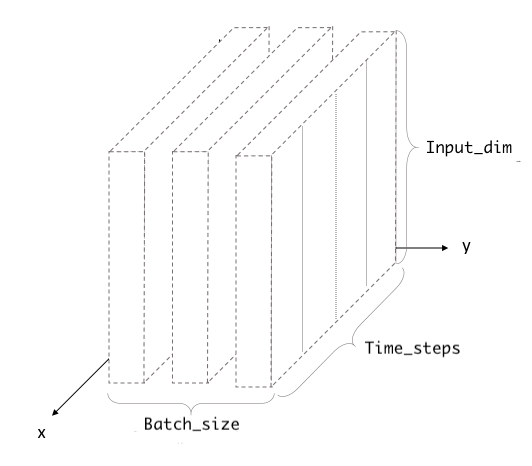

In [251]:
model_norte = RNN_model_search(X_train_norte, y_train_norte, X_val_norte, y_val_norte, X_test_norte, y_test_norte, X_train_val_norte, y_train_val_norte, X_train_norte.shape[1], X_train_norte.shape[2], "Norte")

Topology	Dropout	Algorithm	Learning Rate	Validation Loss	Validation Acc	Epochs	Batch Size	Model Type

[100, 20] 	 0.2 	 sgd_momentum 	 0.0001 	 0.06878732889890671 	 0.06666249781847 	 500 	 16 	 RNN
[10, 10, 10] 	 0.7 	 adam 	 0.01 	 0.022094659507274628 	 0.016339682042598724 	 500 	 16 	 LSTM
[20, 20] 	 0.7 	 adam 	 0.001 	 0.01739177294075489 	 0.014329399913549423 	 500 	 32 	 RNN
[100, 20] 	 0.5 	 adam 	 0.0001 	 0.01714872568845749 	 0.012323155999183655 	 500 	 8 	 RNN
[100, 20] 	 0.5 	 adam 	 0.001 	 0.03301703557372093 	 0.024680934846401215 	 10000 	 8 	 LSTM
[100, 20] 	 0.5 	 adam 	 0.0001 	 0.021953251212835312 	 0.016189752146601677 	 10000 	 16 	 GRU
[100, 50] 	 0.2 	 rmsprop 	 0.01 	 0.023091809824109077 	 0.017641227692365646 	 500 	 64 	 LSTM
[100, 20] 	 0.7 	 adam 	 0.001 	 0.02545926161110401 	 0.02292477898299694 	 500 	 64 	 RNN
[100, 100, 100] 	 0.5 	 rmsprop 	 0.0001 	 0.023850955069065094 	 0.0167276281863451 	 10000 	 32 	 RNN
[50, 100, 50] 	 0.7 	 adam 	 0.00

In [252]:
model_norte.summary()

Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_144 (SimpleRNN)   (None, 4, 100)            10200     
_________________________________________________________________
dropout_239 (Dropout)        (None, 4, 100)            0         
_________________________________________________________________
simple_rnn_145 (SimpleRNN)   (None, 20)                2420      
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 21        
Total params: 12,641
Trainable params: 12,641
Non-trainable params: 0
_________________________________________________________________


In [253]:
model_centro = RNN_model_search(X_train_centro, y_train_centro, X_val_centro, y_val_centro, X_test_centro, y_test_centro, X_train_val_centro, y_train_val_centro, X_train_centro.shape[1], X_train_centro.shape[2], "Centro")

Topology	Dropout	Algorithm	Learning Rate	Validation Loss	Validation Acc	Epochs	Batch Size	Model Type

[100, 50] 	 0.2 	 rmsprop 	 0.0001 	 0.025879494845867157 	 0.02158498205244541 	 1000 	 32 	 GRU
[100, 150] 	 0.5 	 sgd_momentum 	 0.01 	 0.02802606113255024 	 0.023248227313160896 	 10000 	 8 	 GRU
[100, 100, 100] 	 0.7 	 sgd_momentum 	 0.0001 	 0.06785005331039429 	 0.06424580514431 	 1000 	 16 	 GRU
[10, 10, 10] 	 0.7 	 rmsprop 	 0.01 	 0.023973654955625534 	 0.01815594919025898 	 1000 	 16 	 RNN
[50, 100, 50] 	 0.7 	 adam 	 0.001 	 0.027084805071353912 	 0.021206853911280632 	 10000 	 16 	 LSTM
[50, 100, 50] 	 0.5 	 rmsprop 	 0.001 	 0.03550083935260773 	 0.030376136302947998 	 10000 	 32 	 LSTM
[100, 20] 	 0.7 	 rmsprop 	 0.0001 	 0.023833017796278 	 0.019328998401761055 	 1000 	 32 	 RNN
[50, 100, 50] 	 0.2 	 adam 	 0.01 	 0.026656586676836014 	 0.021092599257826805 	 10000 	 8 	 GRU
[100, 100, 100] 	 0.7 	 adam 	 0.01 	 0.040349699556827545 	 0.033935241401195526 	 1000 	 16 	 

In [254]:
model_centro.summary()

Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_145 (LSTM)              (None, 4, 100)            40800     
_________________________________________________________________
dropout_264 (Dropout)        (None, 4, 100)            0         
_________________________________________________________________
lstm_146 (LSTM)              (None, 50)                30200     
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [255]:
model_lvt = RNN_model_search(X_train_lvt, y_train_lvt, X_val_lvt, y_val_lvt, X_test_lvt, y_test_lvt, X_train_val_lvt, y_train_val_lvt, X_train_lvt.shape[1], X_train_lvt.shape[2], "LVT")

Topology	Dropout	Algorithm	Learning Rate	Validation Loss	Validation Acc	Epochs	Batch Size	Model Type

[10, 10, 10] 	 0.5 	 rmsprop 	 0.01 	 0.267283171415329 	 0.209116593003273 	 1000 	 16 	 RNN
[20, 20] 	 0.2 	 adam 	 0.0001 	 0.2295793890953064 	 0.1910429447889328 	 1000 	 8 	 GRU
[100, 20] 	 0.7 	 adam 	 0.001 	 0.3583393394947052 	 0.294519305229187 	 10000 	 8 	 GRU
[100, 20] 	 0.7 	 sgd_momentum 	 0.01 	 0.3332696259021759 	 0.27979913353919983 	 500 	 64 	 LSTM
[100, 50] 	 0.2 	 adam 	 0.001 	 0.25993818044662476 	 0.21860137581825256 	 10000 	 64 	 RNN
[100, 150] 	 0.2 	 sgd_momentum 	 0.01 	 0.3176846206188202 	 0.25808003544807434 	 10000 	 64 	 RNN
[100, 20] 	 0.7 	 adam 	 0.01 	 0.3374082148075104 	 0.26889047026634216 	 10000 	 16 	 GRU
[100, 50] 	 0.5 	 sgd_momentum 	 0.0001 	 0.3711775541305542 	 0.3176615536212921 	 500 	 64 	 RNN
[100, 150] 	 0.2 	 rmsprop 	 0.01 	 0.3268265426158905 	 0.28493520617485046 	 1000 	 64 	 GRU
[50, 100, 50] 	 0.2 	 adam 	 0.01 	 0.385020

In [256]:
model_lvt.summary()

Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_153 (LSTM)              (None, 4, 100)            40800     
_________________________________________________________________
dropout_282 (Dropout)        (None, 4, 100)            0         
_________________________________________________________________
lstm_154 (LSTM)              (None, 150)               150600    
_________________________________________________________________
dense_194 (Dense)            (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________


In [257]:
model_algarve = RNN_model_search(X_train_algarve, y_train_algarve, X_val_algarve, y_val_algarve, X_test_algarve, y_test_algarve, X_train_val_algarve, y_train_val_algarve, X_train_algarve.shape[1], X_train_algarve.shape[2], "Algarve")

Topology	Dropout	Algorithm	Learning Rate	Validation Loss	Validation Acc	Epochs	Batch Size	Model Type

[20, 20] 	 0.2 	 rmsprop 	 0.0001 	 0.06159495934844017 	 0.0501418374478817 	 500 	 64 	 GRU
[20, 20] 	 0.7 	 adam 	 0.001 	 0.06835605204105377 	 0.056052956730127335 	 1000 	 32 	 GRU
[100, 50] 	 0.5 	 adam 	 0.0001 	 0.062112413346767426 	 0.05142100155353546 	 1000 	 64 	 LSTM
[100, 50] 	 0.7 	 rmsprop 	 0.0001 	 0.06736847013235092 	 0.05935276672244072 	 10000 	 16 	 RNN
[20, 20] 	 0.5 	 sgd_momentum 	 0.0001 	 0.08653965592384338 	 0.0753767341375351 	 500 	 64 	 RNN
[100, 150] 	 0.7 	 sgd_momentum 	 0.0001 	 0.06307905167341232 	 0.05114154517650604 	 500 	 8 	 RNN
[100, 50] 	 0.2 	 adam 	 0.001 	 0.06954513490200043 	 0.05798555538058281 	 500 	 64 	 LSTM
[100, 100, 100] 	 0.5 	 rmsprop 	 0.01 	 0.06440873444080353 	 0.05086425319314003 	 10000 	 8 	 RNN
[50, 100, 50] 	 0.7 	 sgd_momentum 	 0.01 	 0.06049108877778053 	 0.05232153832912445 	 10000 	 16 	 RNN
[20, 20] 	 0.2 	 a

In [258]:
model_algarve.summary()

Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_188 (SimpleRNN)   (None, 4, 50)             2600      
_________________________________________________________________
dropout_302 (Dropout)        (None, 4, 50)             0         
_________________________________________________________________
simple_rnn_189 (SimpleRNN)   (None, 4, 100)            15100     
_________________________________________________________________
dropout_303 (Dropout)        (None, 4, 100)            0         
_________________________________________________________________
simple_rnn_190 (SimpleRNN)   (None, 50)                7550      
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 51        
Total params: 25,301
Trainable params: 25,301
Non-trainable params: 0
________________________________________________

In [259]:
model_alentejo = RNN_model_search(X_train_alentejo, y_train_alentejo, X_val_alentejo, y_val_alentejo, X_test_alentejo, y_test_alentejo, X_train_val_alentejo, y_train_val_alentejo, X_train_alentejo.shape[1], X_train_alentejo.shape[2], "Alentejo")

Topology	Dropout	Algorithm	Learning Rate	Validation Loss	Validation Acc	Epochs	Batch Size	Model Type

[20, 20] 	 0.5 	 rmsprop 	 0.01 	 0.031353659927845 	 0.023539502173662186 	 500 	 8 	 GRU
[100, 150] 	 0.7 	 sgd_momentum 	 0.001 	 0.02605491317808628 	 0.02132837288081646 	 500 	 8 	 RNN
[100, 20] 	 0.2 	 adam 	 0.0001 	 0.028697419911623 	 0.024636160582304 	 1000 	 64 	 GRU
[100, 20] 	 0.5 	 sgd_momentum 	 0.001 	 0.026310181245207787 	 0.0220025647431612 	 10000 	 16 	 RNN
[10, 10, 10] 	 0.7 	 adam 	 0.01 	 0.0350361205637455 	 0.0305184293538332 	 1000 	 16 	 LSTM
[20, 20] 	 0.2 	 sgd_momentum 	 0.0001 	 0.02615414187312126 	 0.02175523340702057 	 10000 	 8 	 RNN
[20, 20] 	 0.2 	 sgd_momentum 	 0.0001 	 0.281477153301239 	 0.2802589535713196 	 500 	 64 	 GRU
[100, 20] 	 0.2 	 sgd_momentum 	 0.01 	 0.0263217743486166 	 0.022119998931884766 	 500 	 8 	 LSTM
[100, 20] 	 0.5 	 rmsprop 	 0.0001 	 0.026211757212877274 	 0.022164179012179375 	 500 	 16 	 RNN
[20, 20] 	 0.7 	 adam 	 0.

In [260]:
model_alentejo.summary()

Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_201 (SimpleRNN)   (None, 4, 100)            10200     
_________________________________________________________________
dropout_323 (Dropout)        (None, 4, 100)            0         
_________________________________________________________________
simple_rnn_202 (SimpleRNN)   (None, 150)               37650     
_________________________________________________________________
dense_226 (Dense)            (None, 1)                 151       
Total params: 48,001
Trainable params: 48,001
Non-trainable params: 0
_________________________________________________________________


##Avaliação gráfica do modelo

Os modelos selecionados agora podem ser usados para fazer previsões de séries temporais. Devido à importância fundamental
precisão da previsão, um teste deve ser realizado para verificar a precisão da previsão, comparando as
valores de previsão com valores observacionais. Este teste também pode ajudar a perceber se existe overfitting ou underfitting. Os testes estatísticos dos resultados da previsão são analisados em detalhe nesta secção.

In [ ]:
def predict(model, df, timesteps, multisteps, scaler):
    #get last x days
    input_pred = df[-timesteps]
    predictions = list()
    for step in range(1, multisteps + 1):
        #4 dimension array
        input_pred = input_pred.reshape(1, timesteps, 1)
        y_pred = model.predict(input_pred, verbose = 0)
        #reverse the scaling (from (-1,1) to "normal" scaling)
        #using the scaler that normalized the values we can obtain the values of predicted cases
        y_pred_inversed = scaler.inverse_transform(y_pred)
        predictions.append(y_pred_inversed[0][0])
        #add prediction to input
        input_pred = np.append(input_pred[0], y_pred)
        #eliminate older timestep
        input_pred = input_pred[-timesteps:]
    return predictions

In [ ]:
def createStructurePredict_plot(df, df_total, predictions, scaler):
  df_se = scaler.inverse_transform(df)
  df_data = scaler.inverse_transform(df_total)
  df_prediction = np.append(df_se, predictions)
  return df_data, df_prediction

In [322]:
norte_predictions = predict(model_norte, X_train_val_norte_re, timesteps, X_test_norte.shape[0], scaler_norte)

In [323]:
centro_predictions = predict(model_centro, X_train_val_centro_re, timesteps, X_test_centro.shape[0], scaler_centro)

In [324]:
lvt_predictions = predict(model_lvt, X_train_val_lvt_re, timesteps, X_test_lvt.shape[0], scaler_lvt)

In [325]:
alentejo_predictions = predict(model_alentejo, X_train_val_alentejo_re, timesteps, X_test_alentejo.shape[0], scaler_alentejo)

In [326]:
algarve_predictions = predict(model_algarve, X_train_val_algarve_re, timesteps, X_test_algarve.shape[0], scaler_algarve)

Previsões de novos casos na região do Norte (dia 10 de junho a 20 de junho):
	 [21.758602, 21.025742, 21.544004, 21.986403, 22.552309, 22.60158, 22.733332, 22.826336, 22.89575, 22.922768, 22.9493]
Valores reais:
	 [21.0, 19.0, 17.0, 42.0, 12.0, 19.0, 44.0, 38.0, 29.0, 28.0, 6.0]


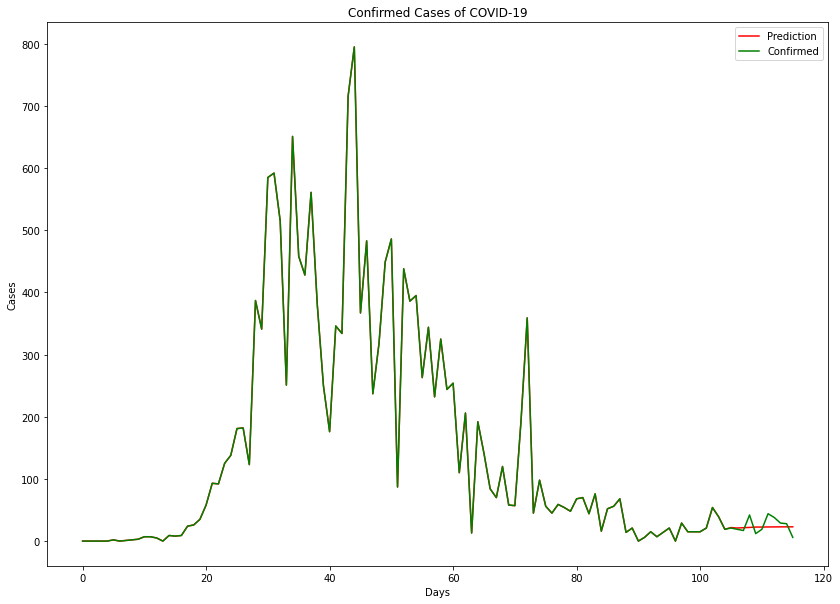

In [327]:
df_norte_pre, df_norte_prediction = createStructurePredict_plot(df_norte[:-X_test_norte.shape[0]], df_norte, norte_predictions, scaler_norte)
print("Previsões de novos casos na região do Norte (dia 10 de junho a 20 de junho):\n\t", norte_predictions)
real_pred_norte = [item[0] for item in df_norte_pre[-X_test_norte.shape[0]:]]
print("Valores reais:\n\t", real_pred_norte)
plot_forecast(df_norte_pre, df_norte_prediction)

Previsões de novos casos na região do Centro (dia 10 de junho a 20 de junho):
	 [6.4933267, 24.837212, 3.9717638, 10.2101145, 4.98899, 10.230059, 5.396673, 16.86139, 7.373046, 21.091883, 4.5778494]
Valores reais:
	 [0.0, 4.0, 5.0, 22.0, 6.0, 18.0, 12.0, 9.0, 21.0, 21.0, 11.0]


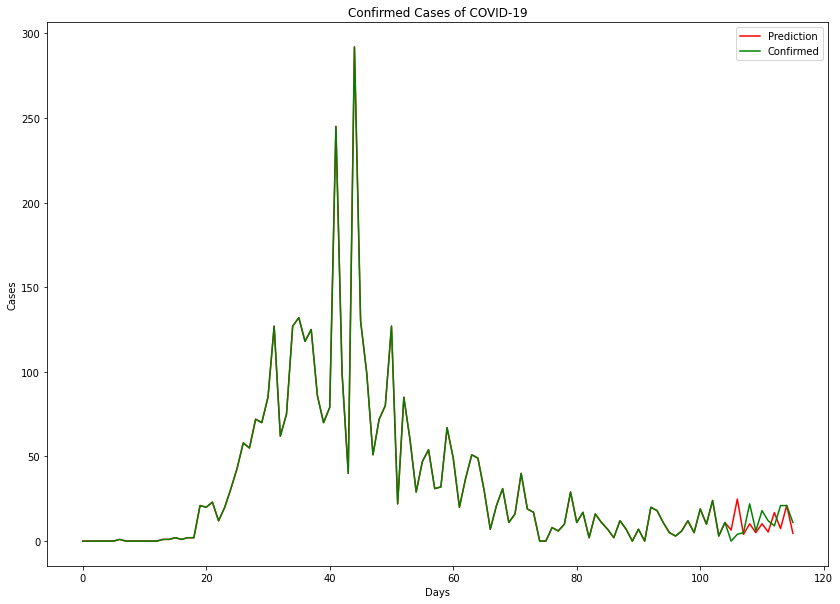

In [328]:
df_centro_pre, df_centro_prediction = createStructurePredict_plot(df_centro[:-X_test_centro.shape[0]], df_centro, centro_predictions, scaler_centro)
print("Previsões de novos casos na região do Centro (dia 10 de junho a 20 de junho):\n\t", centro_predictions)
real_pred_centro = [item[0] for item in df_centro_pre[-X_test_centro.shape[0]:]]
print("Valores reais:\n\t", real_pred_centro)
plot_forecast(df_centro_pre, df_centro_prediction)

Previsões de novos casos na região de Lisboa e Vale do Tejo (dia 10 de junho a 20 de junho):
	 [278.71295, 286.94165, 279.7513, 274.3167, 267.59976, 264.90094, 261.33105, 258.32397, 255.71909, 253.58235, 251.60434]
Valores reais:
	 [270.0, 283.0, 246.0, 215.0, 206.0, 300.0, 235.99999999999997, 282.0, 325.0, 284.0, 282.0]


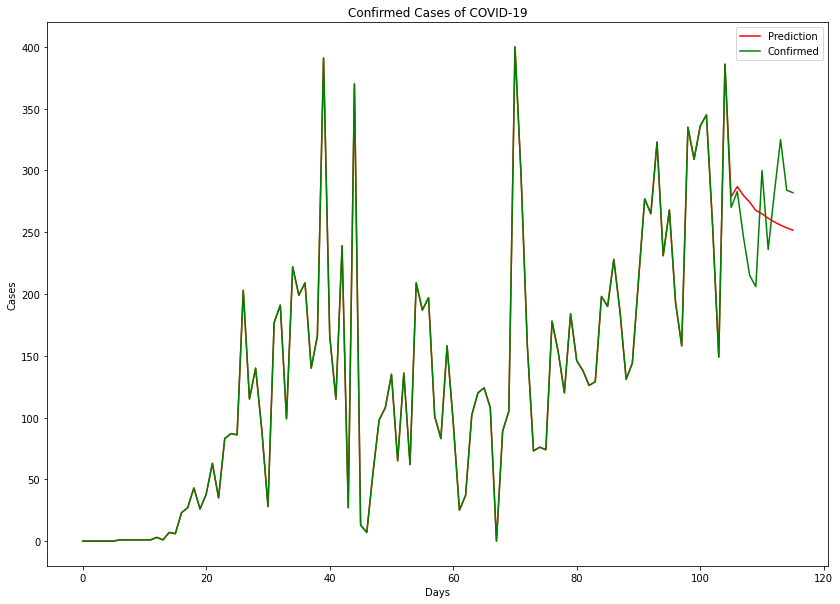

In [329]:
df_lvt_pre, df_lvt_prediction = createStructurePredict_plot(df_lvt[:-X_test_lvt.shape[0]], df_lvt, lvt_predictions, scaler_lvt)
print("Previsões de novos casos na região de Lisboa e Vale do Tejo (dia 10 de junho a 20 de junho):\n\t", lvt_predictions)
real_pred_lvt = [item[0] for item in df_lvt_pre[-X_test_lvt.shape[0]:]]
print("Valores reais:\n\t", real_pred_lvt)
plot_forecast(df_lvt_pre, df_lvt_prediction)

Previsões de novos casos na região do Algarve (dia 10 de junho a 20 de junho):
	 [2.2590282, 8.880646, 1.390104, 2.2446108, 0.5718707, 2.3486698, 2.2396708, 2.5726032, 2.8675668, 1.2767297, 3.3165338]
Valores reais:
	 [2.0, 0.0, 2.0, 0.0, 2.0, 4.0, 8.0, 6.0, 35.0, 32.0, 19.0]


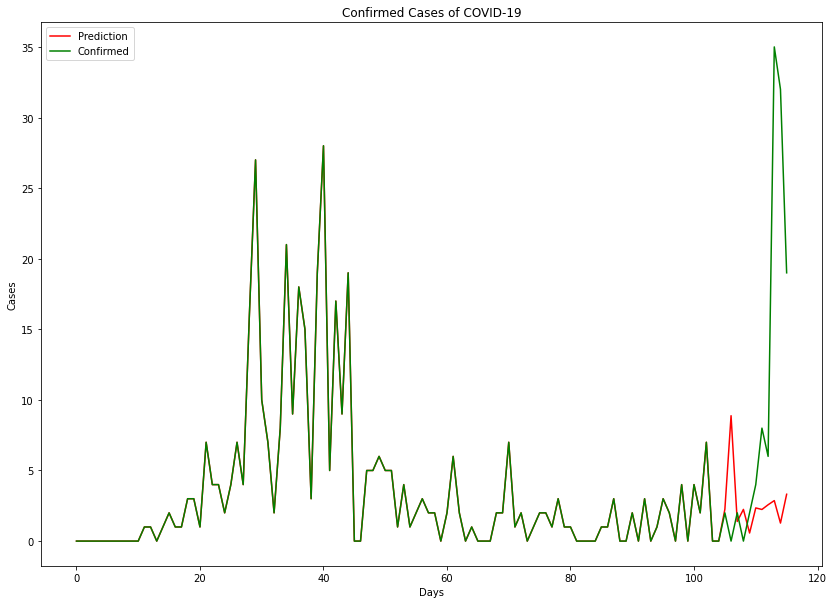

In [330]:
df_algarve_pre, df_algarve_prediction = createStructurePredict_plot(df_algarve[:-X_test_algarve.shape[0]], df_algarve, algarve_predictions, scaler_algarve)
print("Previsões de novos casos na região do Algarve (dia 10 de junho a 20 de junho):\n\t", algarve_predictions)
real_pred_algarve = [item[0] for item in df_algarve_pre[-X_test_algarve.shape[0]:]]
print("Valores reais:\n\t", real_pred_algarve)
plot_forecast(df_algarve_pre, df_algarve_prediction)

Previsões de novos casos na região do Alentejo (dia 10 de junho a 20 de junho):
	 [1.1115663, 1.1158972, 1.1342002, 1.1205878, 1.122351, 1.1225705, 1.12269, 1.1225096, 1.1225386, 1.1225425, 1.1225425]
Valores reais:
	 [1.0, 3.0, 0.0, 4.0, 1.0, 5.0, 0.0, 1.0, 7.0, 9.0, 59.0]


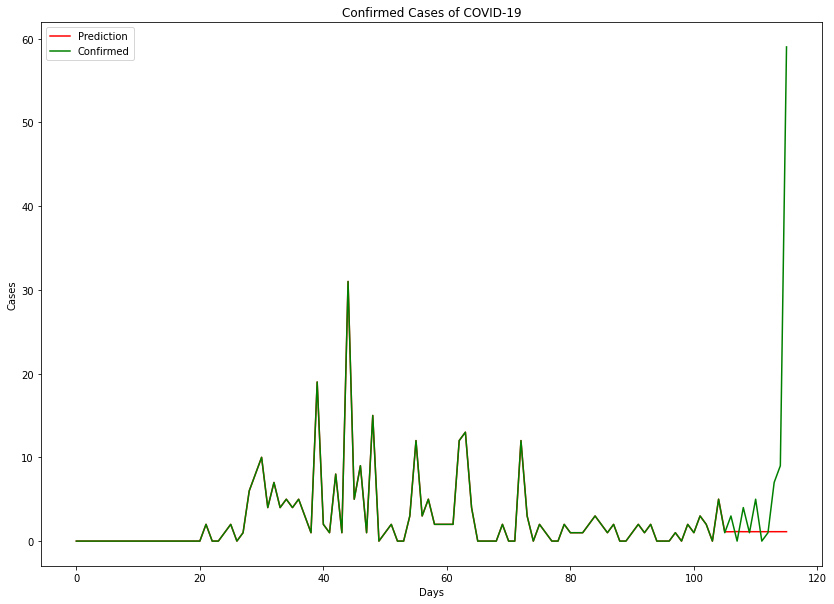

In [331]:
df_alentejo_pre, df_alentejo_prediction = createStructurePredict_plot(df_alentejo[:-X_test_alentejo.shape[0]], df_alentejo, alentejo_predictions, scaler_alentejo)
print("Previsões de novos casos na região do Alentejo (dia 10 de junho a 20 de junho):\n\t", alentejo_predictions)
real_pred_alentejo = [item[0] for item in df_alentejo_pre[-X_test_alentejo.shape[0]:]]
print("Valores reais:\n\t", real_pred_alentejo)
plot_forecast(df_alentejo_pre, df_alentejo_prediction)

## Previsão de novos casos

Nesta seção foi feita uma previsão de casos ainda não observados, permitindo ter um resultado da previsão de cada um dos modelos. O número de dias a prever são 4.

In [ ]:
def forecast(model, df, timesteps, multisteps, scaler):
    #get last x days
    input_pred = df[-timesteps:]
    predictions = list()
    for step in range(1, multisteps + 1):
        #4 dimension array
        input_pred = input_pred.reshape(1, timesteps, 1)
        y_pred = model.predict(input_pred, verbose = 0)
        #reverse the scaling (from (-1,1) to "normal" scaling)
        #using the scaler that normalized the values we can obtain the values of predicted cases
        y_pred_inversed = scaler.inverse_transform(y_pred)
        predictions.append(y_pred_inversed[0][0])
        #add prediction to input
        input_pred = np.append(input_pred[0], y_pred)
        #eliminate older timestep
        input_pred = input_pred[-timesteps:]
    return predictions

In [ ]:
def plot_forecast(data, predictions):
  plt.figure(figsize=(14,10))
  plt.plot(range(len(predictions)), predictions, color='red', label='Prediction')
  plt.plot(data, color='green', label='Confirmed')
  plt.title('Confirmed Cases of COVID-19')
  plt.ylabel('Cases')
  plt.xlabel('Days')
  plt.legend()
  plt.show()

In [ ]:
def createStructure_plot(df, predictions, scaler):
  df_se = scaler.inverse_transform(df)
  df_prediction = np.append(df_se, predictions)
  return df_se, df_prediction

In [332]:
multisteps = 4

In [333]:
norte_forecast = forecast(model_norte, df_norte, timesteps, multisteps, scaler_norte)

In [334]:
centro_forecast = forecast(model_centro, df_centro, timesteps, multisteps, scaler_centro)

In [335]:
lvt_forecast = forecast(model_lvt, df_lvt, timesteps, multisteps, scaler_lvt)

In [336]:
alentejo_forecast = forecast(model_alentejo, df_alentejo, timesteps, multisteps, scaler_alentejo)

In [337]:
algarve_forecast = forecast(model_algarve, df_algarve, timesteps, multisteps, scaler_algarve)

Previsões de novos casos na região do Norte(dia 21 junho a 24 de junho): [24.363085, 22.419233, 22.231062, 21.627983]


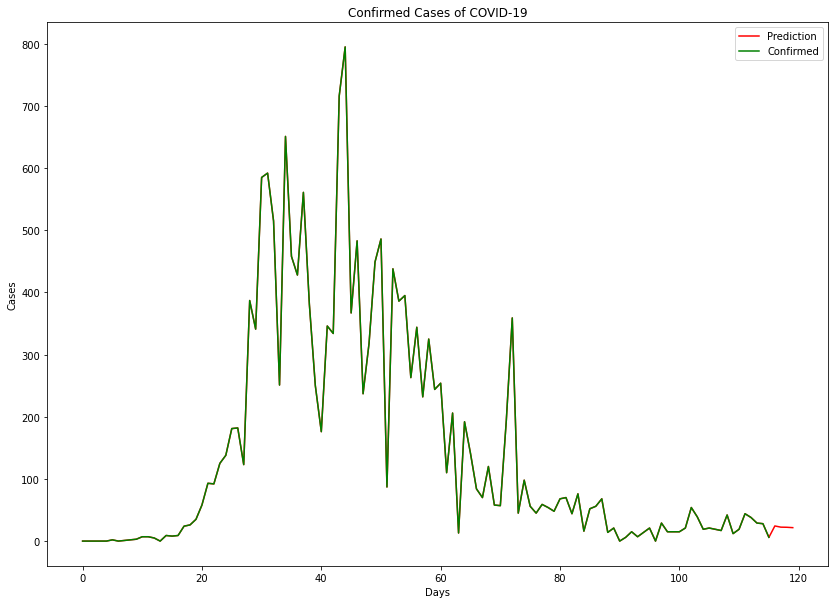

In [338]:
df_norte_se, df_norte_forecast = createStructure_plot(df_norte, norte_forecast, scaler_norte)
print("Previsões de novos casos na região do Norte(dia 21 junho a 24 de junho):", norte_forecast)
plot_forecast(df_norte_se, df_norte_forecast)

Previsões de novos casos naCentro (dia 21 junho a 24 de junho): [11.146032, 27.41881, 29.113585, 54.704803]


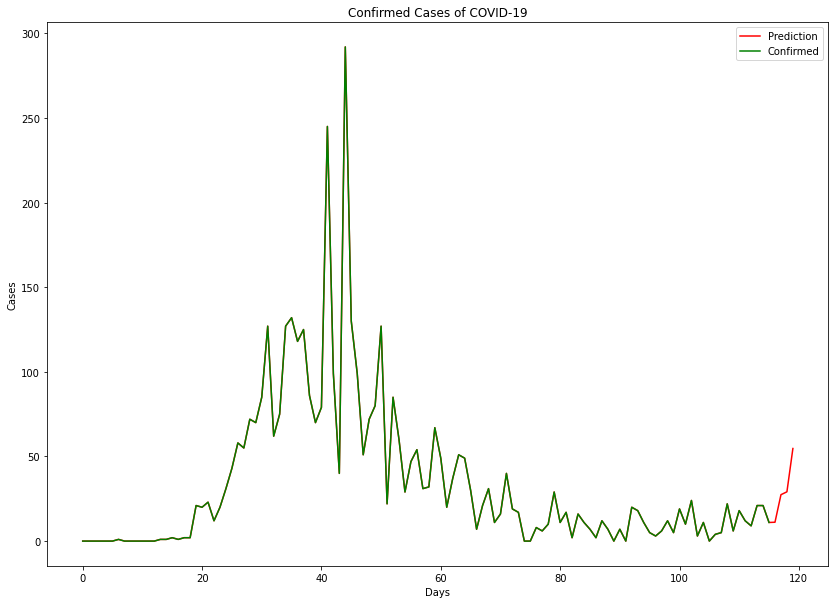

In [339]:
df_centro_se, df_centro_forecast = createStructure_plot(df_centro, centro_forecast, scaler_centro)
print("Previsões de novos casos naCentro (dia 21 junho a 24 de junho):", centro_forecast)
plot_forecast(df_centro_se, df_centro_forecast)

Previsões de novos casos na região de Lisboa e Vale do Tejo (dia 21 junho a 24 de junho): [275.82306, 272.4165, 266.20782, 263.08643]


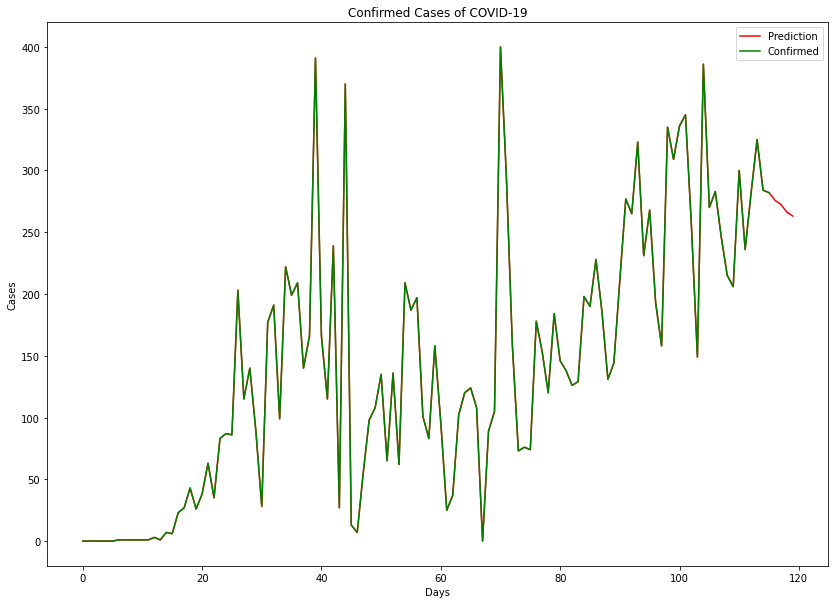

In [340]:
df_lvt_se, df_lvt_forecast = createStructure_plot(df_lvt, lvt_forecast, scaler_lvt)
print("Previsões de novos casos na região de Lisboa e Vale do Tejo (dia 21 junho a 24 de junho):", lvt_forecast)
plot_forecast(df_lvt_se, df_lvt_forecast)

Previsões de novos casos na região do Algarve (dia 21 junho a 24 de junho): [6.591639, 3.6780586, 4.493804, 17.64053]


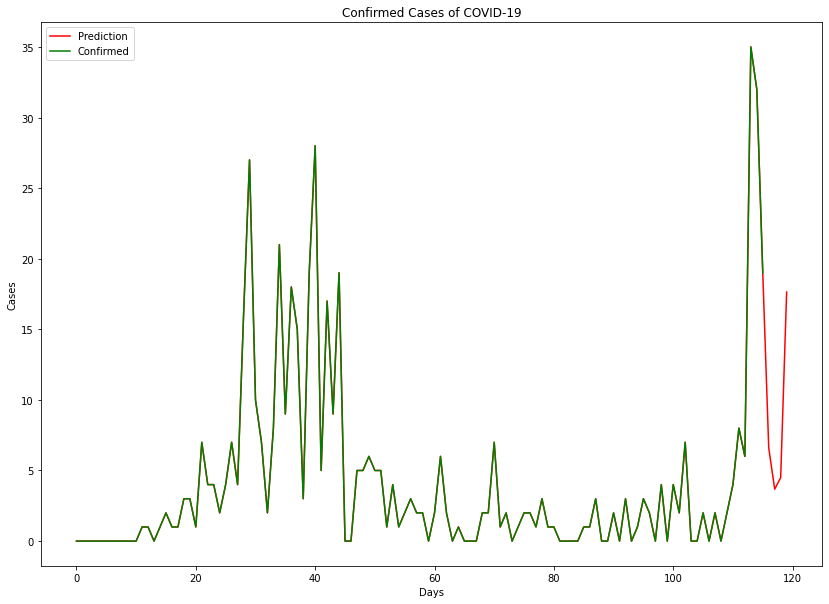

In [341]:
df_algarve_se, df_algarve_forecast = createStructure_plot(df_algarve, algarve_forecast, scaler_algarve)
print("Previsões de novos casos na região do Algarve (dia 21 junho a 24 de junho):", algarve_forecast)
plot_forecast(df_algarve_se, df_algarve_forecast)

Previsões de novos casos na região do Alentejo (dia 21 junho a 24 de junho): [1.4604601, 1.8993179, 2.798511, 3.079022]


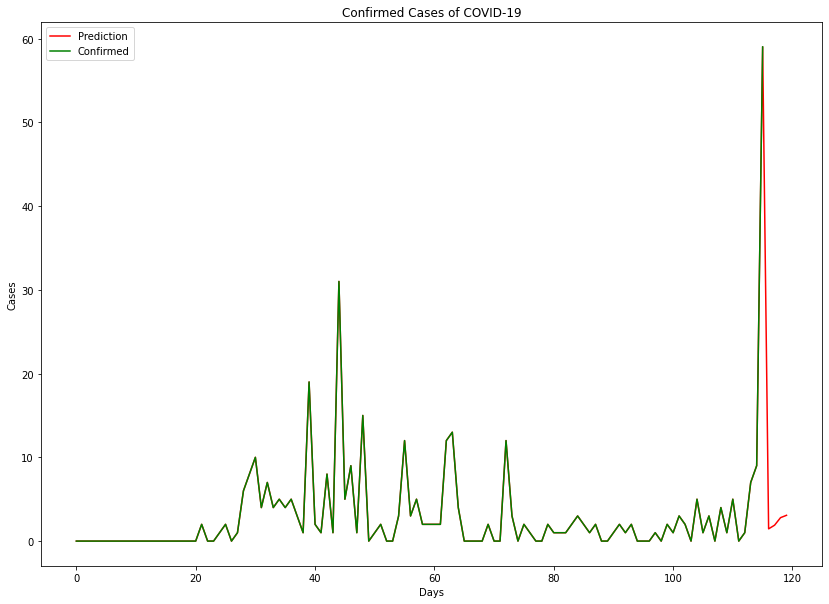

In [342]:
df_alentejo_se, df_alentejo_forecast = createStructure_plot(df_alentejo, alentejo_forecast, scaler_alentejo)
print("Previsões de novos casos na região do Alentejo (dia 21 junho a 24 de junho):", alentejo_forecast)
plot_forecast(df_alentejo_se, df_alentejo_forecast)

##Conclusões

In [344]:
rnn_results = read_dataset(best_fileRNN)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(rnn_results)

          test_loss  test_acc   val_acc  val_loss         layers  dropout     algorithm  learning rate  epochs  batch_size model
city                                                                                                                            
Norte      0.016096  0.013513  0.012323  0.017149      [100, 20]      0.5          adam         0.0001     500           8   RNN
Centro     0.032643  0.022665  0.015313  0.021699      [100, 50]      0.7          adam         0.0010   10000          16  LSTM
LVT        0.099127  0.079913  0.196444  0.221251     [100, 150]      0.2  sgd_momentum         0.0100    1000          16  LSTM
Algarve    0.220016  0.139194  0.052322  0.060491  [50, 100, 50]      0.7  sgd_momentum         0.0100   10000          16   RNN
Alentejo   0.301032  0.127606  0.021328  0.026055     [100, 150]      0.7  sgd_momentum         0.0010     500           8   RNN


* A criação de entradas diferentes para cada uma das *features* preditivas seria uma análise a fazer como trabalho futuro para analisar se teria influência nos resultados tratar a temperatura e os dados do COVID-19 de forma separada. Por se tratarem de dados que ambos têm uma tendência sazonal, entraram na mesma camada do modelo. 
* Nos gráficos das previsões dos valores de teste é possível observar-se que os modelos não conseguem apresentar uma resposta suficientemente boa para conseguir seguir as tendências dos dados (subida e descida do número de novos casos).
* Os modelos, a partir dos valores da tabela anexada acima, é possível observar-se os valores de erro no treino e na validação. Como era de esperar, os valores de treino são superiores ao da validação. No entanto, no caso do Algarve e do Alentejo o modelo apresenta muito overfitting. Uma mudança no valor de dropout poderia significar numa diminuição desse overfitting.
* Uma análise multivariada poderá resolver apresentar melhores resultados.